In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
len(df)

5572

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Balance this data

In [7]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [9]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [10]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [11]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [12]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### Exploratory Data Analysis

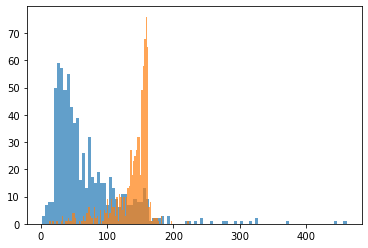

In [13]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)

plt.show()

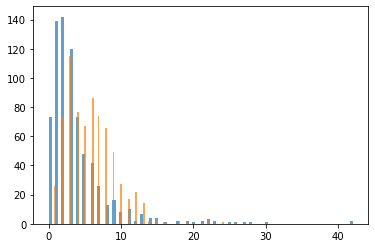

In [14]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)

plt.show()

### Data Preparation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
data.head()

,label,message,length,punct
0,ham,"No, but you told me you were going, before you...",57,3
1,ham,"Oh right, ok. I'll make sure that i do loads o...",149,5
2,ham,Pls pls find out from aunt nike.,32,1
3,ham,Im in inperialmusic listening2the weirdest tra...,154,4
4,ham,Yo do you know anyone &lt;#&gt; or otherwise...,156,7


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle=True, stratify=data['label'])

In [19]:
X_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742                        Have you finished work yet? :)
477                     I have lost 10 kilos as of today!
542     Not planned yet :)going to join company on jan...
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312     I call you later, don't have network. If urgnt...
268             see you then, we're all christmassy here!
272     Hi dis is yijue i would be happy to work wif ü...
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

In [20]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
        ... 
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

### Bag of Words Creation

In [21]:
vectorizer = TfidfVectorizer()

In [22]:
X_train = vectorizer.fit_transform(X_train)

In [23]:
X_train.shape

(1045, 3642)

In [24]:
X_train

<1045x3642 sparse matrix of type '<class 'numpy.float64'>'
	with 17724 stored elements in Compressed Sparse Row format>

In [25]:
1045*3708

3874860

### Pipeline and RF

In [29]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [30]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [31]:
y_pred = clf.predict(X_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[223,   2],
       [ 26, 198]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [34]:
 accuracy_score(y_test, y_pred)

0.9376391982182628

In [35]:
clf.predict(["Text me on 8877887767"])

array(['ham'], dtype=object)

### SVM

In [36]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])

In [37]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [38]:
y_pred = clf.predict(X_test)

In [39]:
confusion_matrix(y_test, y_pred)

array([[219,   6],
       [ 19, 205]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.97      0.95       225
        spam       0.97      0.92      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [41]:
 accuracy_score(y_test, y_pred)

0.9443207126948775

In [42]:
clf.predict(["you have won tickets"])

array(['spam'], dtype=object)